In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('all_upwork_jobs_2024-02-07-2024-03-24.csv')
print(df.head())

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                                link  \
0  https://www.upwork.com/jobs/Experienced-Media-...   
1  https://www.upwork.com/jobs/Full-Stack-Develop...   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7...   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec...   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0...   

              published_date  is_hourly  hourly_low  hourly_high  budget  \
0  2024-02-17 09:09:54+00:00      False         NaN          NaN   500.0   
1  2024-02-17 09:09:17+00:00      False         NaN          NaN  1100.0   
2  2024-02-17 09:08:46+00:00       True        10.0         30.0     NaN   
3  2024-02-17 09:08:08

In [3]:
print(df.head())
print(df.info())
print(df.describe())

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                                link  \
0  https://www.upwork.com/jobs/Experienced-Media-...   
1  https://www.upwork.com/jobs/Full-Stack-Develop...   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7...   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec...   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0...   

              published_date  is_hourly  hourly_low  hourly_high  budget  \
0  2024-02-17 09:09:54+00:00      False         NaN          NaN   500.0   
1  2024-02-17 09:09:17+00:00      False         NaN          NaN  1100.0   
2  2024-02-17 09:08:46+00:00       True        10.0         30.0     NaN   
3  2024-02-17 09:08:08

In [4]:
print("original shape:", df.shape)
df.head()

original shape: (244828, 8)


,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [7]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

hourly_high       146053
hourly_low        142406
budget            140937
country             5077
title                  1
link                   1
published_date         0
is_hourly              0
dtype: int64

In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [9]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
print("Missing values after cleaning:")
df.isnull().sum().max()

Missing values after cleaning:


0

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244828 non-null  object 
 1   link            244828 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      244828 non-null  float64
 5   hourly_high     244828 non-null  float64
 6   budget          244828 non-null  float64
 7   country         244828 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB
None


In [12]:
print(df.dtypes)

title              object
link               object
published_date     object
is_hourly            bool
hourly_low        float64
hourly_high       float64
budget            float64
country            object
dtype: object


In [13]:
print(df.describe())

          hourly_low    hourly_high          budget
count  244828.000000  244828.000000   244828.000000
mean       15.978773      34.829501      444.342967
std        11.789481      30.955729    10254.421295
min         3.000000       3.000000        5.000000
25%        15.000000      30.000000      100.000000
50%        15.000000      30.000000      100.000000
75%        15.000000      30.000000      100.000000
max       998.000000     999.000000  1000000.000000


In [14]:
print(df.columns)

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')


In [15]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [16]:
df['budget'] = df['budget'].replace(r'[\$,]', '', regex=True).astype(float)
df['hourly_low'] = df['hourly_low'].replace(r'[\$,]', '', regex=True).astype(float)

In [17]:
df.dropna(subset=['title'], inplace=True)

In [18]:
tfidf = TfidfVectorizer(stop_words='english', max_features=50)
X_title = tfidf.fit_transform(df['title'])

In [19]:
salary_df = pd.DataFrame(X_title.toarray(), columns=tfidf.get_feature_names_out())
salary_df['budget'] = df['budget'].fillna(df['budget'].mean())

In [20]:
correlation = salary_df.corr()['budget'].sort_values(ascending=False)


In [21]:
correlation.head(10)


budget         1.000000
sales          0.023439
development    0.008528
developer      0.006028
build          0.003991
new            0.003426
specialist     0.002649
manager        0.002612
app            0.002127
ai             0.002032
Name: budget, dtype: float64

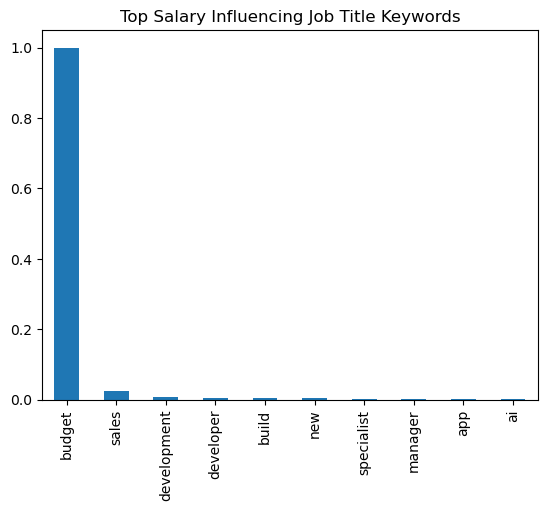

In [22]:
correlation.head(10).plot(kind='bar', title='Top Salary Influencing Job Title Keywords')
plt.show()

In [24]:
df['month'] = df['published_date'].dt.to_period('M')
category_trend = (
    df.groupby(['month', 'title'])
    .size()
    .reset_index(name='job_count')
)
emerging_categories = (
    category_trend.groupby('title')['job_count']
    .mean()
    .sort_values(ascending=False)
)
emerging_categories.head(10)

C:\Users\BARSHA PRASAD\AppData\Local\Temp\ipykernel_8244\930739504.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['published_date'].dt.to_period('M')


title
Social Media Manager              210.0
Virtual Assistant                 169.5
Logo Design                       155.5
Video Editor                      149.0
Graphic Designer                  146.0
Logo design                        86.5
Shopping mall store management     71.0
Logo Designer                      71.0
Full Stack Developer               68.0
Website Development                64.5
Name: job_count, dtype: float64

In [25]:
role_demand = (
    df.groupby(['month', 'title'])
    .size()
    .reset_index(name='postings')
)

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

role_encoded = LabelEncoder()
role_demand['title_encoded'] = role_encoded.fit_transform(role_demand['title'])

X = role_demand[['title_encoded']]
y = role_demand['postings']

model = LinearRegression()
model.fit(X, y)

role_demand['predicted_demand'] = model.predict(X)

role_demand.sort_values('predicted_demand', ascending=False).head(10)

,month,title,postings,title_encoded,predicted_demand
210902,2024-03,󰐢 Appointment Setting For Permanent Makeup VA ...,1,205469,1.200020
210901,2024-03,🧸 Sales Video For Toy 🧸,1,205468,1.200020
210900,2024-03,🧑‍💻 Seeking a Detail-Oriented SEO Assistant fo...,1,205467,1.200020
210899,2024-03,🧑‍🎨🚀 [Long-term] Frontend Developer &amp; Desi...,1,205466,1.200019
106,2024-01,🧑‍🎨 Looking For UI/UX Designers Who Specialize...,1,205465,1.200019
210898,2024-03,🥷🏿 Senior iOS Engineer 🚀,1,205464,1.200019
210897,2024-03,🥶📧 BULK Cold Email Wholesale RESELLER Accounts...,1,205463,1.200018
210896,2024-03,🥂 Mystery Shopper Needed for Beers &amp; Bever...,1,205462,1.200018
210895,2024-03,🤩Video project choosing cosmetics // Poland🤩,1,205461,1.200017
210894,2024-03,🤩Video project about choosing cosmetics // Pol...,1,205460,1.200017


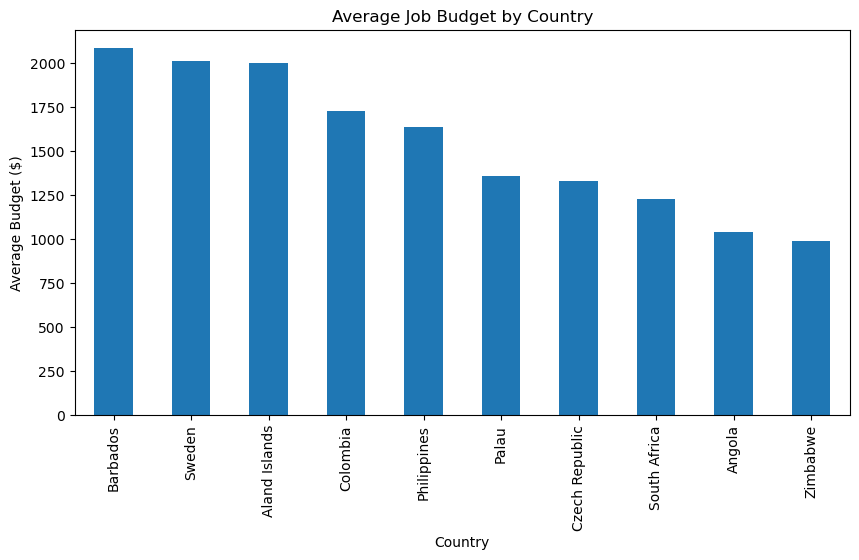

In [25]:
country_rate = (
    df.groupby('country')['budget']
    .mean()
    .sort_values(ascending=False)
)

country_rate.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Average Job Budget by Country")
plt.ylabel("Average Budget ($)")
plt.xlabel("Country")
plt.show()

In [26]:
def recommend_jobs(job_index, top_n=5):
    sim_scores = list(enumerate(cos_sim[job_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    job_indices = [i[0] for i in sim_scores]

    return df[['title', 'budget', 'country']].iloc[job_indices]

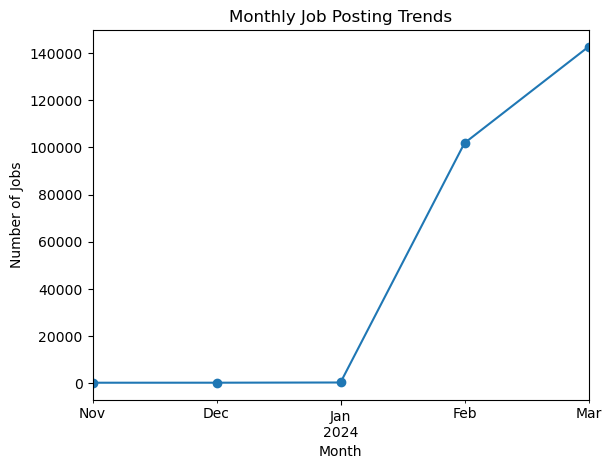

In [27]:
monthly_jobs = df.groupby('month').size()

monthly_jobs.plot(marker='o')
plt.title("Monthly Job Posting Trends")
plt.xlabel("Month")
plt.ylabel("Number of Jobs")
plt.show()

In [28]:
def detect_remote(title):
    title = title.lower()
    if 'remote' in title or 'work from home' in title or 'online' in title:
        return 1
    else:
        return 0

df['is_remote'] = df['title'].apply(detect_remote)

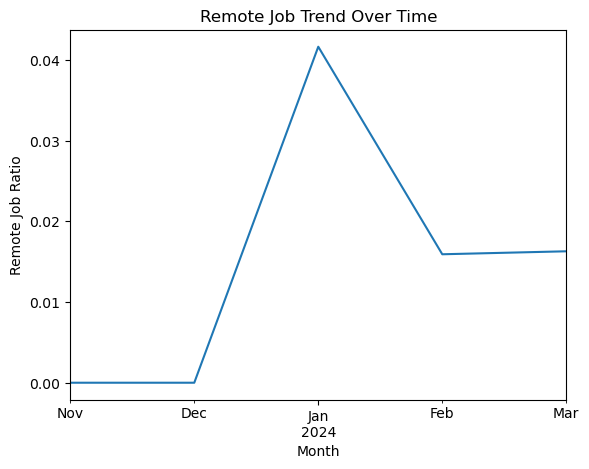

In [29]:
remote_trend = (
    df.groupby('month')['is_remote']
    .mean()
)

remote_trend.plot()
plt.title("Remote Job Trend Over Time")
plt.ylabel("Remote Job Ratio")
plt.xlabel("Month")
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# Convert month to numeric
df['month_num'] = df['month'].astype(str).str.replace('-', '').astype(int)

In [32]:
X_future = df[['month_num']]

In [33]:
# Use budget as target variable
y_future = df['budget'].fillna(df['budget'].mean())

future_model = LinearRegression()
future_model.fit(X_future, y_future)

LinearRegression()

In [34]:
df['future_budget_prediction'] = future_model.predict(X_future)

In [35]:
df[['month', 'future_budget_prediction']].tail()


,month,future_budget_prediction
244823,2024-03,447.506277
244824,2024-03,447.506277
244825,2024-03,447.506277
244826,2024-03,447.506277
244827,2024-03,447.506277


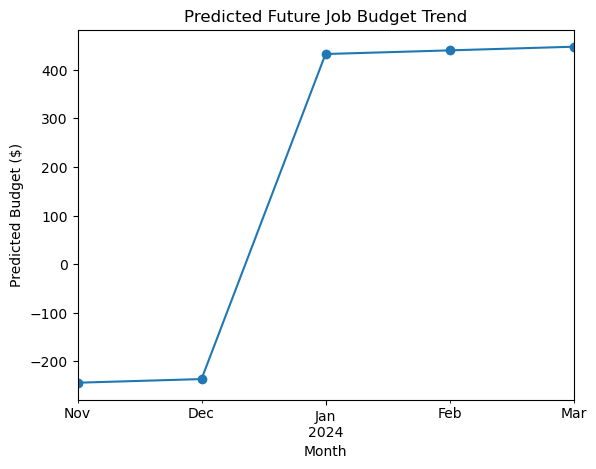

In [36]:
df.groupby('month')['future_budget_prediction'].mean().plot(marker='o')
plt.title("Predicted Future Job Budget Trend")
plt.ylabel("Predicted Budget ($)")
plt.xlabel("Month")
plt.show()

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
print(df.columns)


Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'month', 'is_remote', 'month_num',
       'future_budget_prediction'],
      dtype='object')


In [39]:
df['combined_text'] = df['title'].fillna('')


In [40]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
tfidf_matrix = tfidf.fit_transform(df['combined_text'])


In [42]:
# Recommendation function
def recommend_jobs(user_skills, top_n=5):
    user_vec = tfidf.transform([user_skills])
    similarity = cosine_similarity(user_vec, tfidf_matrix).flatten()
    
    top_indices = similarity.argsort()[-top_n:][::-1]
    return df.iloc[top_indices][['title', 'country', 'budget']]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [44]:
category_trend = df.groupby('title').size().reset_index(name='job_count')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [46]:
# Assuming df is your DataFrame
df = pd.DataFrame({  # your data here
    'title': [...],
    'link': [...],
    'published_date': [...],
    'is_hourly': [...],
    'hourly_low': [...],
    'hourly_high': [...]
})


In [47]:
# Drop rows with missing values
df = df.dropna(subset=['hourly_low', 'hourly_high'])

X = df[['hourly_low']]
y = df['hourly_high']

In [48]:
print(df[['hourly_low', 'hourly_high']].isnull().sum())
print(df.shape)

hourly_low     0
hourly_high    0
dtype: int64
(1, 6)


In [49]:
valid_df = df.dropna(subset=['hourly_low', 'hourly_high'])
print(valid_df.shape)


(1, 6)


In [50]:
print(X.shape)
print(y.shape)

(1, 1)
(1,)


In [51]:
valid_df = df.dropna(subset=['hourly_low', 'hourly_high'])
X = valid_df[['hourly_low']]
y = valid_df['hourly_high']
print(X.shape, y.shape)

(1, 1) (1,)


In [52]:
# Assuming you have X and y
valid_df = df.dropna(subset=['hourly_low', 'hourly_high'])
X = valid_df[['hourly_low']]
y = valid_df['hourly_high']

if len(X) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
else:
    print("Not enough data ")

Not enough data 


In [53]:
from flask import Flask, request, jsonify
import pickle

In [53]:
app = Flask(__name__)

@app.route('/recommend', methods=['POST'])
def recommend():
    data = request.json
    skills = data.get('skills')
    results = recommend_jobs(skills)
    return jsonify(results.to_dict(orient='records'))

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\BARSHA PRASAD\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

def recommend_jobs(skills):
    # Dummy example logic
    data = {
        "skills": skills,
        "recommended_jobs": ["Data Analyst", "ML Engineer", "Python Developer"]
    }
    return data

@app.route('/recommend', methods=['POST'])
def recommend():
    data = request.get_json()
    skills = data.get('skills')

    if not skills:
        return jsonify({"error": "Skills are required"}), 400

    results = recommend_jobs(skills)
    return jsonify(results)

if __name__ == "__main__":
    app.run(
        debug=True,
        use_reloader=False,  # REQUIRED for Jupyter
        host="127.0.0.1",
        port=5000
    )

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
FROM python:3.10

WORKDIR /app

COPY requirements.txt .
RUN pip install -r requirements.txt

COPY . .

CMD ["python", "app.py"]

In [ ]:
import streamlit as st
import plotly.express as px